# 환경데이터 분석 (기말고사 대체 과제)

In [385]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

## 1. 파일 읽어오기

weather.csv 는 cp949 인코딩이라서 그냥 utf-8로 read 하면 오류 발생함.

In [386]:
air_df = pd.read_csv("./measuredData.csv")

weather_df = pd.read_csv("./weather.csv", encoding="cp949")

## 2. 기본 정보 및 기초 통계량 확인

### 2-1. 기본 정보 확인

In [387]:
display(air_df.head())
print(air_df.shape)
display(weather_df.head())
print(weather_df.shape)

,날짜,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2.5
0,2021-10-01 01,0.003,0.6,0.001,0.042,35.0,20.0
1,2021-10-01 02,0.003,0.5,0.003,0.031,31.0,16.0
2,2021-10-01 03,0.003,0.4,0.005,0.023,25.0,13.0
3,2021-10-01 04,0.003,0.4,0.002,0.025,25.0,13.0
4,2021-10-01 05,0.003,0.4,0.002,0.023,27.0,15.0


(744, 7)


,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),습도(%)
0,108,서울,2021-10-01 1:00,18.7,NaN,1.0,85
1,108,서울,2021-10-01 2:00,18.3,NaN,0.3,89
2,108,서울,2021-10-01 3:00,17.7,NaN,2.0,92
3,108,서울,2021-10-01 4:00,17.4,NaN,1.0,91
4,108,서울,2021-10-01 5:00,17.2,NaN,1.3,94


(744, 7)


### 2-2. 기초 통계량 확인

In [388]:
display(air_df.describe())
display(weather_df.describe())

,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2.5
count,738.000000,738.000000,712.000000,738.000000,738.000000,738.000000
mean,0.003214,0.388211,0.021588,0.022798,25.589431,12.911924
std,0.000486,0.112619,0.015737,0.011497,10.986398,7.633149
min,0.002000,0.200000,0.001000,0.004000,3.000000,1.000000
25%,0.003000,0.300000,0.008000,0.014000,17.000000,7.000000
50%,0.003000,0.400000,0.021000,0.021000,25.000000,13.000000
75%,0.003000,0.500000,0.032000,0.029000,34.000000,18.000000
max,0.006000,0.900000,0.081000,0.059000,72.000000,51.000000


,지점,기온(°C),강수량(mm),풍속(m/s),습도(%)
count,744.0,744.000000,100.000000,744.000000,744.000000
mean,108.0,15.570833,0.570000,2.100538,69.740591
std,0.0,5.649605,1.469041,1.038207,17.454225
min,108.0,1.300000,0.000000,0.000000,27.000000
25%,108.0,11.400000,0.000000,1.375000,57.000000
50%,108.0,16.450000,0.050000,2.000000,72.000000
75%,108.0,19.525000,0.500000,2.700000,85.000000
max,108.0,28.700000,12.700000,6.300000,99.000000


## 3. 한글 컬럼명 영문명으로 변경

In [389]:
air_df.rename(columns={
	"날짜" : "date",
	"아황산가스" : "SO2",
	"일산화탄소" : "CO",
	"오존" : "O3",
	"이산화질소" : "NO2"
	}, inplace=True)

weather_df.rename(columns={
	"지점" : "center_num",
	"지점명" : "center",
	"일시" : "date",
	"기온(°C)" : "temperature",
	"강수량(mm)" : "rain",
	"풍속(m/s)" : "wind",
	"습도(%)" : "humid"
}, inplace=True)

display(air_df.head())
display(weather_df.head())

,date,SO2,CO,O3,NO2,PM10,PM2.5
0,2021-10-01 01,0.003,0.6,0.001,0.042,35.0,20.0
1,2021-10-01 02,0.003,0.5,0.003,0.031,31.0,16.0
2,2021-10-01 03,0.003,0.4,0.005,0.023,25.0,13.0
3,2021-10-01 04,0.003,0.4,0.002,0.025,25.0,13.0
4,2021-10-01 05,0.003,0.4,0.002,0.023,27.0,15.0


,center_num,center,date,temperature,rain,wind,humid
0,108,서울,2021-10-01 1:00,18.7,NaN,1.0,85
1,108,서울,2021-10-01 2:00,18.3,NaN,0.3,89
2,108,서울,2021-10-01 3:00,17.7,NaN,2.0,92
3,108,서울,2021-10-01 4:00,17.4,NaN,1.0,91
4,108,서울,2021-10-01 5:00,17.2,NaN,1.3,94


## 4. 데이터 타입 변경

### 4-1. 데이터 병합 및 불필요한 컬럼 삭제

두 데이터는 자정을 표기하는 방식이 다름.  
2021년 10월 1일 자정을  
air_df는 **2021-10-01 24**로 표기하고  
weather_df는 **2021-10-02 0:00**으로 표기함  

따라서 날짜를 기준으로 병합하려면 처리를 해야 합니다.

In [390]:
weather_df.drop(columns=["center_num", "center"], inplace=True)

# hour 컬럼 생성
air_df["hour"] = air_df["date"].str[-2:].astype("int")

# 시간 제외해서 datetime으로 변경
air_df["date"] = pd.to_datetime(air_df["date"].str[:10])

# weather_df도 datetime으로 변경
weather_df["date"] = pd.to_datetime(weather_df["date"])

# 24시인 행의 날짜 +1
air_df.loc[air_df["hour"] == 24, "date"] = air_df["date"] + pd.Timedelta(days=1)

# 24시를 0시로 변경
air_df.loc[air_df["hour"] == 24, "hour"] = 0

# 날짜와 시간 결합
air_df["date"] = air_df["date"] + pd.to_timedelta(air_df["hour"], unit="h")

# 데이터 병합
df = air_df.merge(weather_df, on="date")

# date 컬럼에서 시간 지우기
df["date"] = pd.to_datetime(df["date"].astype("str").str[:11])

# 컬럼 순서 변경
df = df[[
	"date",
	"hour",
	"SO2",
	"CO",
	"O3",
	"NO2",
	"PM10",
	"PM2.5",
	"temperature",
	"rain",
	"wind",
	"humid"
	]]

# 습도 컬럼 float으로 변경
df["humid"] = df["humid"].astype("float64")

display(df.head())

,date,hour,SO2,CO,O3,NO2,PM10,PM2.5,temperature,rain,wind,humid
0,2021-10-01,1,0.003,0.6,0.001,0.042,35.0,20.0,18.7,NaN,1.0,85.0
1,2021-10-01,2,0.003,0.5,0.003,0.031,31.0,16.0,18.3,NaN,0.3,89.0
2,2021-10-01,3,0.003,0.4,0.005,0.023,25.0,13.0,17.7,NaN,2.0,92.0
3,2021-10-01,4,0.003,0.4,0.002,0.025,25.0,13.0,17.4,NaN,1.0,91.0
4,2021-10-01,5,0.003,0.4,0.002,0.023,27.0,15.0,17.2,NaN,1.3,94.0


### 4-2. 데이터 타입 확인

In [391]:
display(df.dtypes)

date           datetime64[ns]
hour                    int64
SO2                   float64
CO                    float64
O3                    float64
NO2                   float64
PM10                  float64
PM2.5                 float64
temperature           float64
rain                  float64
wind                  float64
humid                 float64
dtype: object

### 4-3. date 컬럼 date 타입으로 변경

## 5. 결측치 확인 및 처리

### 5-1. 결측치 확인

In [392]:
display(df.isna().sum())

date             0
hour             0
SO2              6
CO               6
O3              32
NO2              6
PM10             6
PM2.5            6
temperature      0
rain           644
wind             0
humid            0
dtype: int64

### 5-2. 결측치 처리

**대기질 관련 컬럼들은 이전값으로 채우기로 함.**  
연속적으로 결측치인 부분이 많을 경우 시간별 평균치로 채우려고 했으나, 연속적으로 결측치인 부분이 많지 않음.  

In [393]:
cols = ["SO2", "CO", "O3", "NO2", "PM10", "PM2.5"]

df[cols] = df[cols].interpolate(method="linear")

df["rain"] = df["rain"].fillna(0)
display(df.isna().sum())

date           0
hour           0
SO2            0
CO             0
O3             0
NO2            0
PM10           0
PM2.5          0
temperature    0
rain           0
wind           0
humid          0
dtype: int64

## 6. 상관계수 함수를 이용하여 요소별 상관관계 분석

In [394]:
corr = df.corr()
display(corr)
display(corr["PM10"].sort_values(ascending=False))
display(corr["PM2.5"].sort_values(ascending=False))

,date,hour,SO2,CO,O3,NO2,PM10,PM2.5,temperature,rain,wind,humid
date,1.000000,-0.007737,0.224577,0.288569,-0.227077,0.439783,0.182085,0.209482,-0.618572,-0.113265,-0.239437,-0.418533
hour,-0.007737,1.000000,0.177806,0.021035,0.351291,-0.015063,0.122020,0.081453,0.234098,0.052830,0.162896,-0.313707
SO2,0.224577,0.177806,1.000000,0.396022,0.206660,0.263776,0.487049,0.475573,0.059556,-0.050742,-0.056340,-0.201001
CO,0.288569,0.021035,0.396022,1.000000,-0.378382,0.807061,0.548969,0.645073,-0.196607,-0.057192,-0.459092,0.072908
O3,-0.227077,0.351291,0.206660,-0.378382,1.000000,-0.585281,0.164437,0.083638,0.446033,0.036129,0.422768,-0.426350
NO2,0.439783,-0.015063,0.263776,0.807061,-0.585281,1.000000,0.377521,0.498701,-0.315793,-0.063324,-0.482178,0.084462
PM10,0.182085,0.122020,0.487049,0.548969,0.164437,0.377521,1.000000,0.910272,-0.045913,-0.038768,-0.021518,-0.181703
PM2.5,0.209482,0.081453,0.475573,0.645073,0.083638,0.498701,0.910272,1.000000,-0.048784,-0.011595,-0.156008,-0.034289
temperature,-0.618572,0.234098,0.059556,-0.196607,0.446033,-0.315793,-0.045913,-0.048784,1.000000,0.043851,0.239709,0.175256
rain,-0.113265,0.052830,-0.050742,-0.057192,0.036129,-0.063324,-0.038768,-0.011595,0.043851,1.000000,0.055063,0.168212


PM10           1.000000
PM2.5          0.910272
CO             0.548969
SO2            0.487049
NO2            0.377521
date           0.182085
O3             0.164437
hour           0.122020
wind          -0.021518
rain          -0.038768
temperature   -0.045913
humid         -0.181703
Name: PM10, dtype: float64

PM2.5          1.000000
PM10           0.910272
CO             0.645073
NO2            0.498701
SO2            0.475573
date           0.209482
O3             0.083638
hour           0.081453
rain          -0.011595
humid         -0.034289
temperature   -0.048784
wind          -0.156008
Name: PM2.5, dtype: float64

## 7. 히스토그램으로 시각화

array([[<Axes: title={'center': 'SO2'}>, <Axes: title={'center': 'CO'}>,
        <Axes: title={'center': 'O3'}>],
       [<Axes: title={'center': 'NO2'}>,
        <Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'PM2.5'}>],
       [<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'humid'}>]], dtype=object)

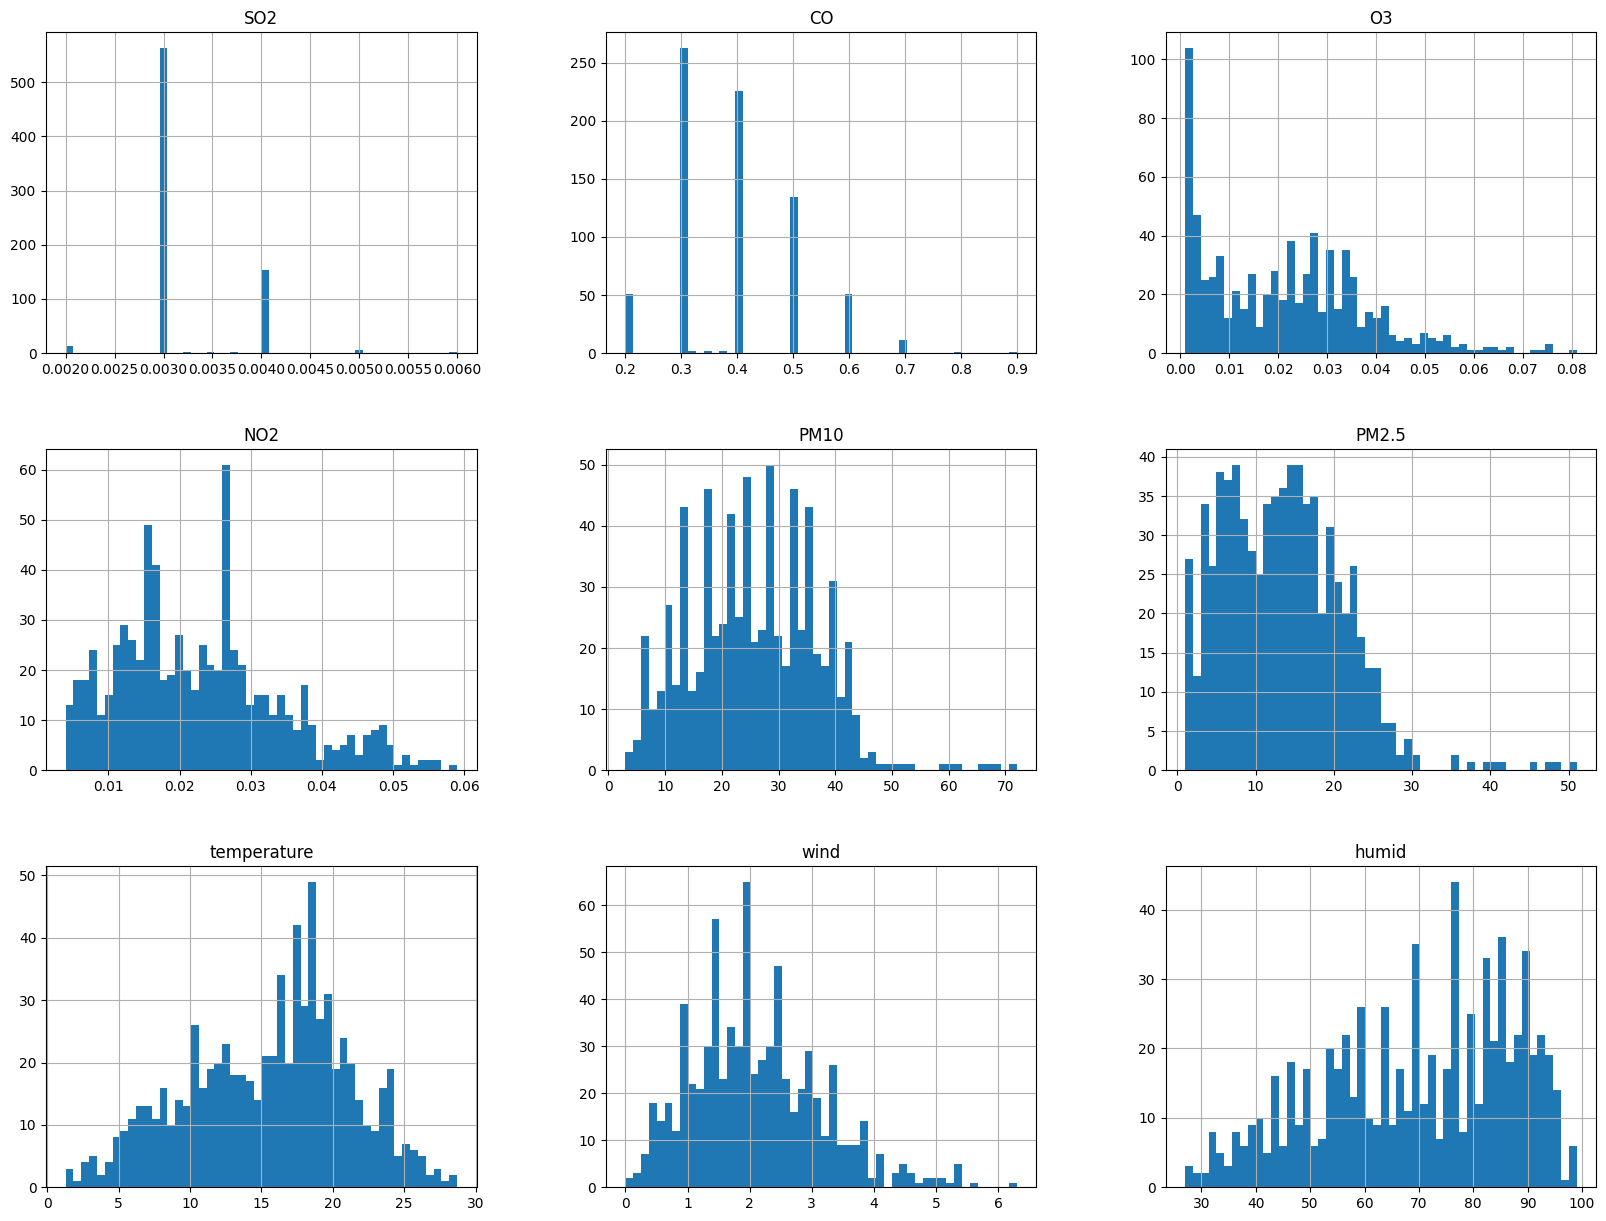

In [410]:
df[["SO2", "CO", "O3", "NO2", "PM10", "PM2.5", "temperature", "wind", "humid"]].hist(bins=50, figsize=(20,15))

## 8. 막대그래프로 일별 현황 그래프 출력

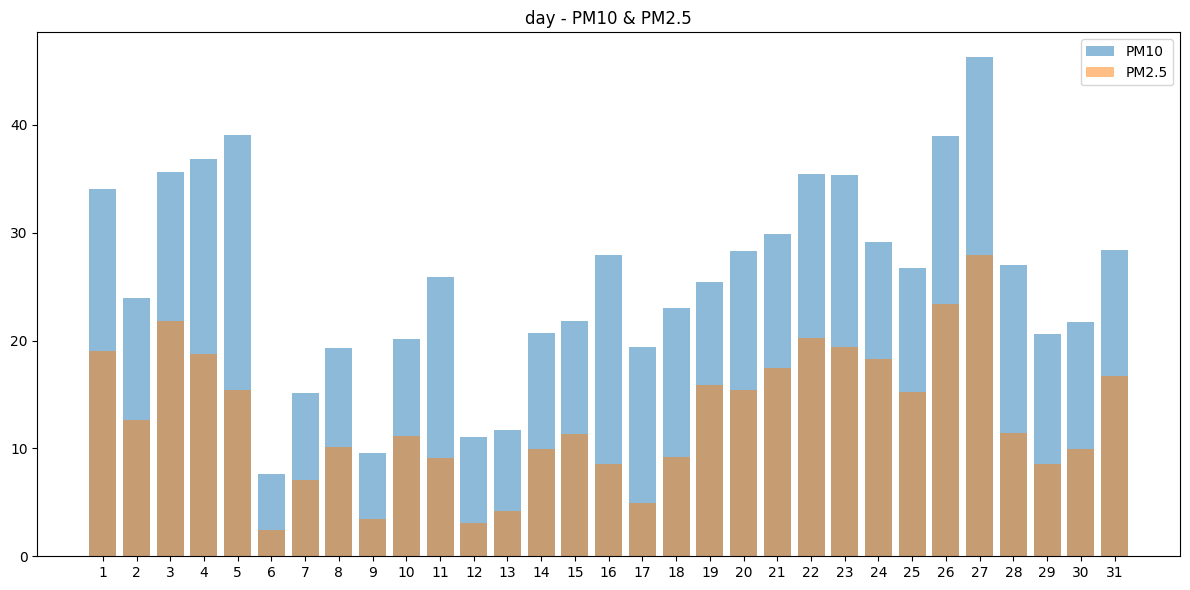

In [396]:
df["day"] = df["date"].dt.day

df_pm10 = df.groupby("day")["PM10"].mean()
df_pm2_5 = df.groupby("day")["PM2.5"].mean()

plt.figure(figsize=(12,6))
plt.bar(df_pm10.index, df_pm10.values, alpha=0.5, label="PM10")
plt.bar(df_pm2_5.index, df_pm2_5.values, alpha=0.5, label="PM2.5")
plt.title("day - PM10 & PM2.5")

plt.xticks(df_pm10.index)
plt.legend()

plt.tight_layout()
plt.show()

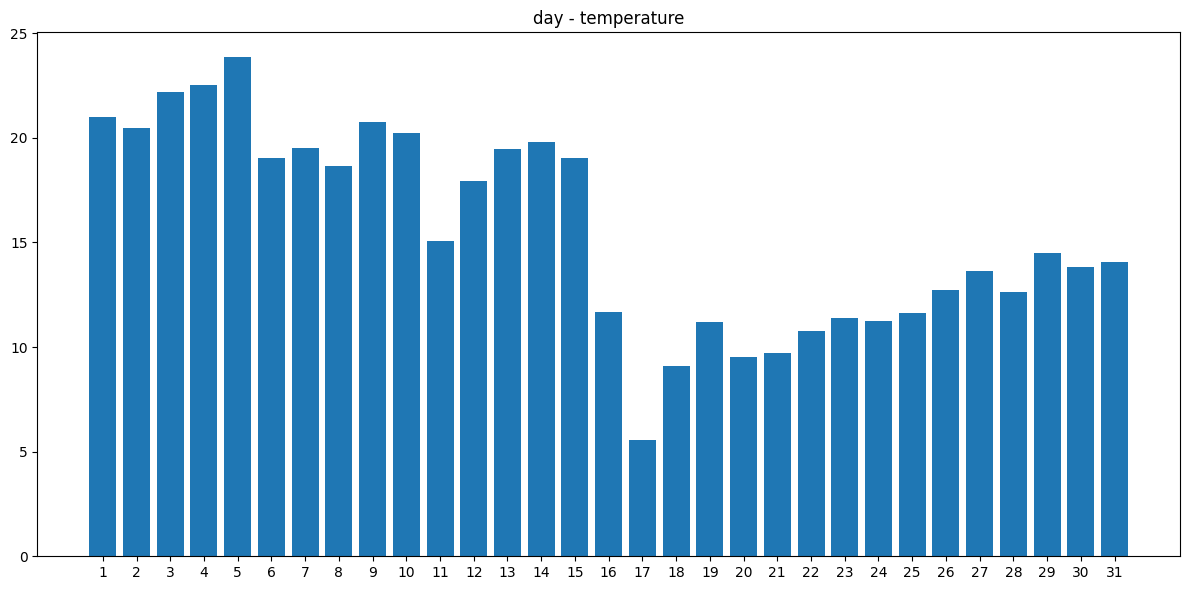

In [397]:
df_temperature = df.groupby("day")["temperature"].mean()

plt.figure(figsize=(12,6))

plt.title("day - temperature")
plt.bar(df_temperature.index, df_temperature.values)
plt.xticks(df_temperature.index)

plt.tight_layout()
plt.show()

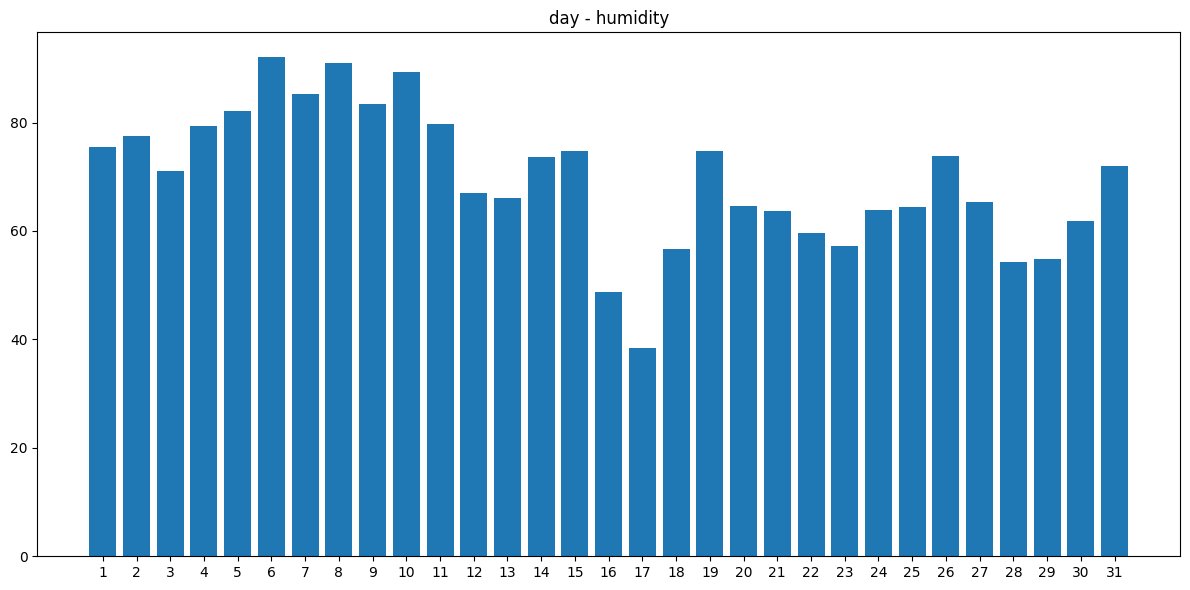

In [403]:
df_humid = df.groupby("day")["humid"].mean()

plt.figure(figsize=(12,6))

plt.title("day - humidity")
plt.bar(df_humid.index, df_humid.values)
plt.xticks(df_humid.index)

plt.tight_layout()
plt.show()

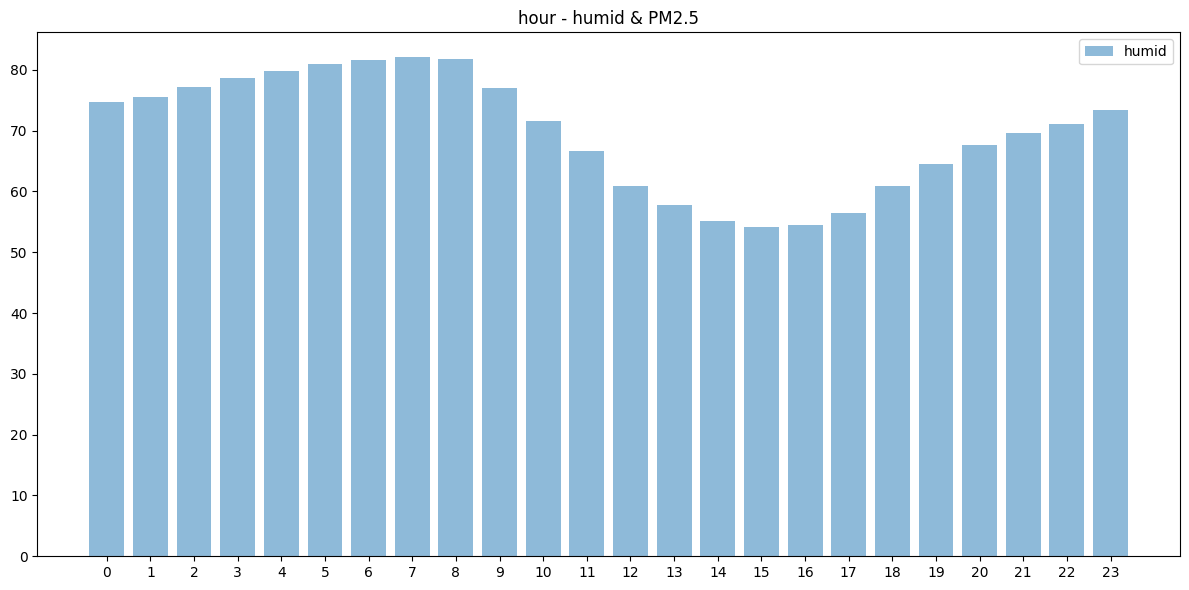

In [415]:
df_humid_hour = df.groupby("hour")["humid"].mean()

plt.figure(figsize=(12,6))
plt.bar(df_humid_hour.index, df_humid_hour.values, alpha=0.5, label="humid")
plt.title("hour - humid & PM2.5")

plt.xticks(df_humid_hour.index)
plt.legend()

plt.tight_layout()
plt.show()

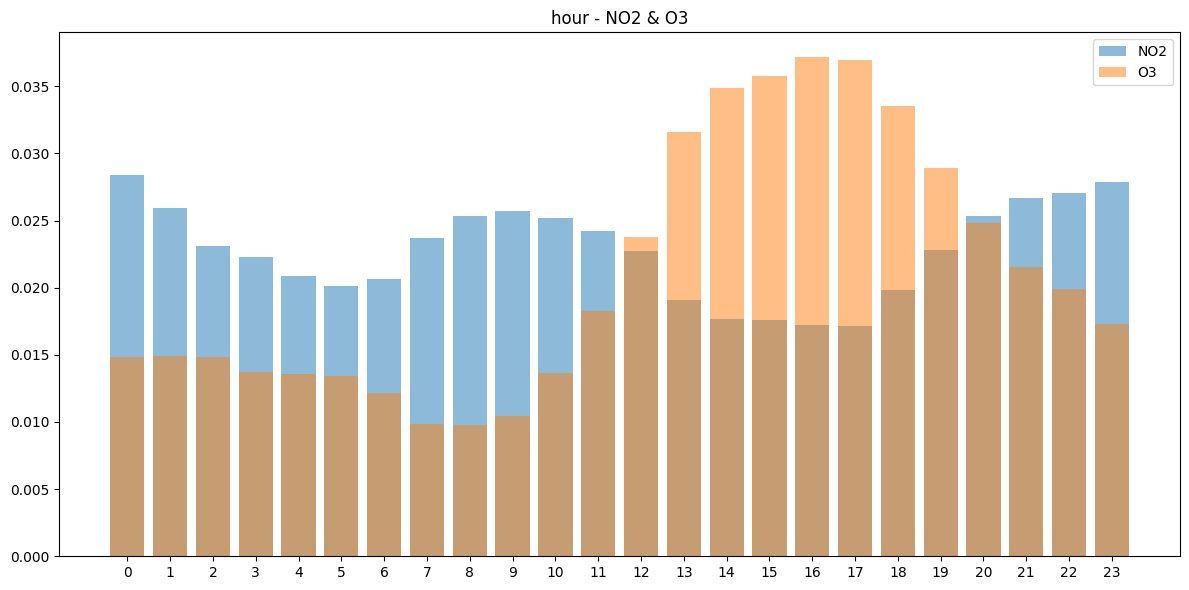

In [ ]:
df_no2 = df.groupby("hour")["NO2"].mean()
df_o3 = df.groupby("hour")["O3"].mean()

plt.figure(figsize=(12,6))
plt.bar(df_no2.index, df_no2.values, alpha=0.5, label="NO2")
plt.bar(df_o3.index, df_o3.values, alpha=0.5, label="O3")
plt.title("hour - NO2 & O3")

plt.xticks(df_no2.index)
plt.legend()

plt.tight_layout()
plt.show()

## 9. 히트맵으로 상관관계 시각화

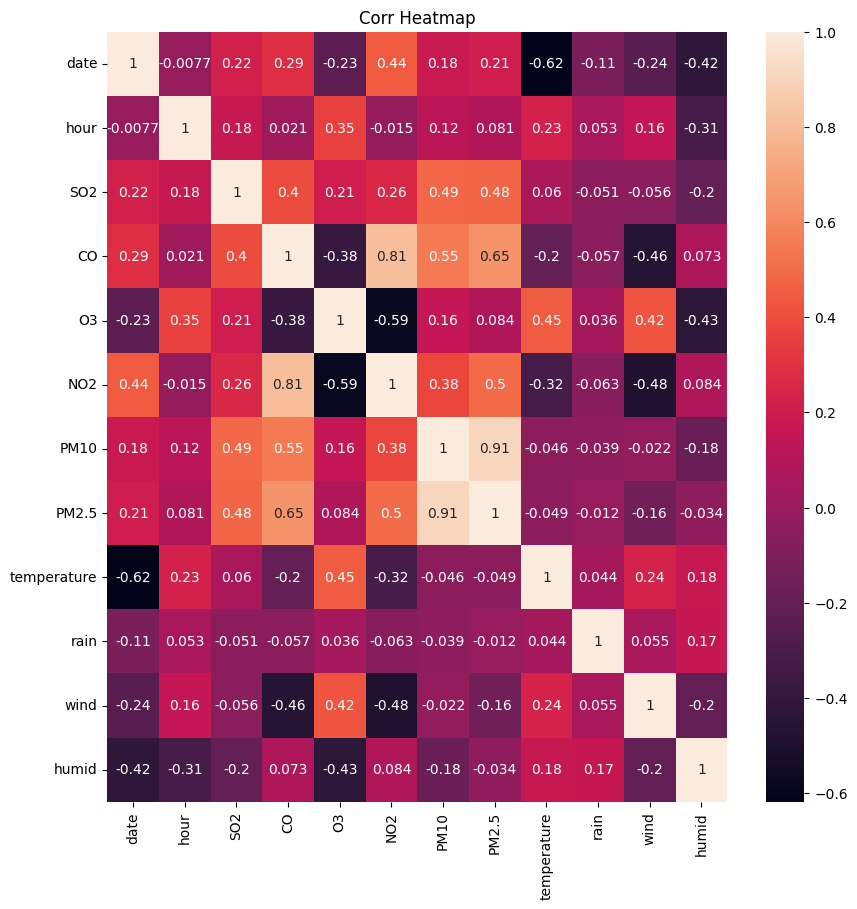

In [399]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.title("Corr Heatmap")
plt.show()

## 10. 산점도 그래프로 온도와 미세먼지(PM10) 확인

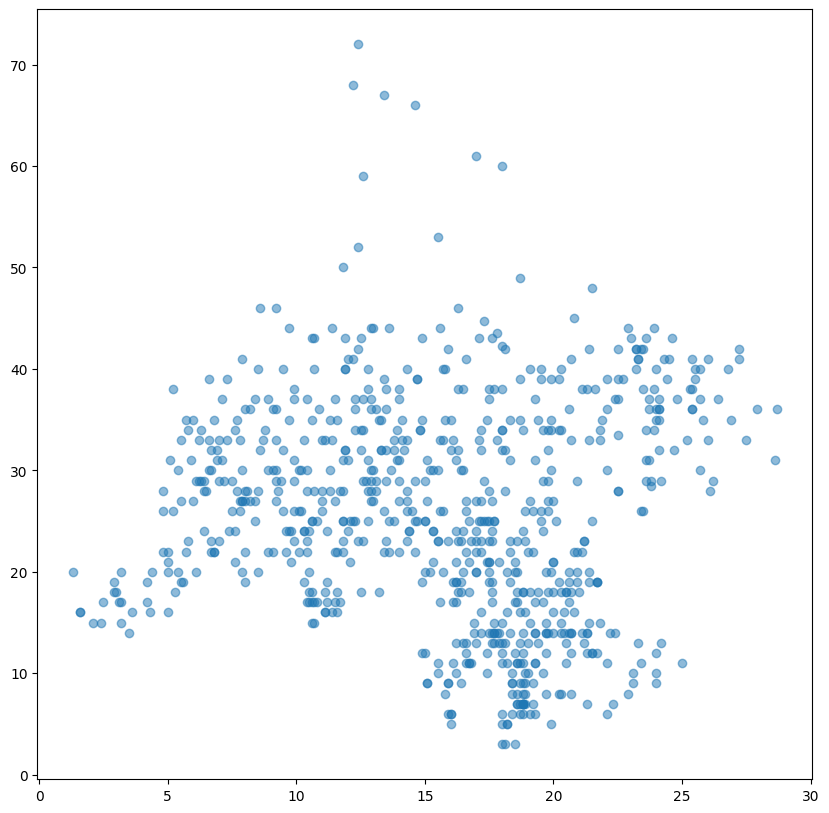

In [400]:
plt.figure(figsize=(10,10))
plt.scatter(df["temperature"], df["PM10"], alpha=0.5)
plt.show()

## 11. 미세먼지(PM10) 과 초미세먼지(PM2.5) 관계를 산점도 그래프로 확인

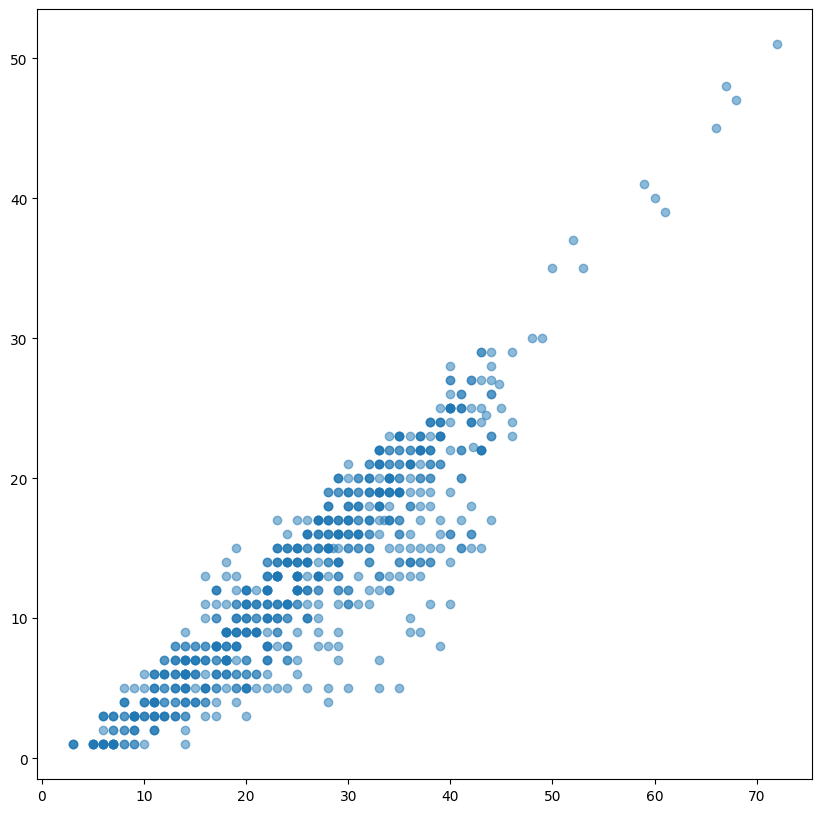

In [401]:
plt.figure(figsize=(10,10))
plt.scatter(df["PM10"], df["PM2.5"], alpha=0.5)
plt.show()

## 12. 데이터 분석 정리